Trading Analytics

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Display the first few rows of the dataframe
trades.head()


,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,VALUE DATE,STAKE,PRICE,BOUNDARY PRICE,...,SETTLEMENT PRICE,RESULT,PAYOUT,TYPE.1,EXPIRY.1,STRIKE PRICE,SETTLEMENT.1,SETTLEMENT PRICE.1,PROFIT,LOSS
0,06 Dec 2024 20:09:35,Close Bet,O2-DC-9DBXNZ,T2-DC-5PHGNM,O2-DC-9DBXN5,US NDAQ 100 - Cash,-,2.0,"21,597.08",-,...,-,-,-,-,-,-,-,-,-,-
1,06 Dec 2024 15:51:26,Close Bet,O2-DC-9DBKJF,T2-DC-5PH66L,O2-DC-9D9S0F,Crude Oil West Texas - Cash,-,3.0,67.338,-,...,-,-,-,-,-,-,-,-,-,-
2,06 Dec 2024 15:50:57,Close Bet,O2-DC-9DBKGJ,T2-DC-5PH64Z,O2-DC-9DB7TT,US 30 - Cash,-,1.0,"44,794.75",-,...,-,-,-,-,-,-,-,-,-,-
3,06 Dec 2024 08:47:16,Close Bet,O2-DC-9D9RYD,T2-DC-5PGHE8,O2-DC-9D9RDW,Crude Oil West Texas - Cash,-,1.0,68.252,-,...,-,-,-,-,-,-,-,-,-,-
4,06 Dec 2024 08:47:05,Close Bet,O2-DC-9D9RXR,T2-DC-5PGHDX,O2-DC-9D9RHP,Gasoline - Cash,-,2.0,1.9553,-,...,-,-,-,-,-,-,-,-,-,-


In [132]:
# Total number of trades
total_trades = len(trades)
print(f'Total Number of Trades: {total_trades}')


Total Number of Trades: 443


In [133]:
# Calculate win rate
wins = trades[trades['AMOUNT (GBP)'] > 0]  # Replace 'Profit' with your actual profit/loss column name
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 46.05%


In [134]:
# Rename the 'AMOUNT (GBP)' column to 'PL'
trades.rename(columns={'AMOUNT (GBP)': 'PL'}, inplace=True)


In [135]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'VALUE DATE', 'STAKE', 'PRICE', 'BOUNDARY PRICE', 'STOP LOSS',
       'TAKE PROFIT', 'MARGIN (GBP)', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)',
       'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE',
       'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)',
       'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET',
       'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT',
       'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1',
       'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS'],
      dtype='object')


In [136]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE/TIME                    443 non-null    object 
 1   TYPE                         443 non-null    object 
 2   ORDER#                       443 non-null    object 
 3   BET#                         443 non-null    object 
 4   REL. ORDER#                  443 non-null    object 
 5   PRODUCT                      443 non-null    object 
 6   VALUE DATE                   443 non-null    object 
 7   STAKE                        443 non-null    float64
 8   PRICE                        443 non-null    object 
 9   BOUNDARY PRICE               443 non-null    object 
 10  STOP LOSS                    443 non-null    object 
 11  TAKE PROFIT                  443 non-null    object 
 12  MARGIN (GBP)                 443 non-null    object 
 13  VALUE (GBP)         

In [137]:
trades.head()

,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,VALUE DATE,STAKE,PRICE,BOUNDARY PRICE,...,SETTLEMENT PRICE,RESULT,PAYOUT,TYPE.1,EXPIRY.1,STRIKE PRICE,SETTLEMENT.1,SETTLEMENT PRICE.1,PROFIT,LOSS
0,06 Dec 2024 20:09:35,Close Bet,O2-DC-9DBXNZ,T2-DC-5PHGNM,O2-DC-9DBXN5,US NDAQ 100 - Cash,-,2.0,"21,597.08",-,...,-,-,-,-,-,-,-,-,-,-
1,06 Dec 2024 15:51:26,Close Bet,O2-DC-9DBKJF,T2-DC-5PH66L,O2-DC-9D9S0F,Crude Oil West Texas - Cash,-,3.0,67.338,-,...,-,-,-,-,-,-,-,-,-,-
2,06 Dec 2024 15:50:57,Close Bet,O2-DC-9DBKGJ,T2-DC-5PH64Z,O2-DC-9DB7TT,US 30 - Cash,-,1.0,"44,794.75",-,...,-,-,-,-,-,-,-,-,-,-
3,06 Dec 2024 08:47:16,Close Bet,O2-DC-9D9RYD,T2-DC-5PGHE8,O2-DC-9D9RDW,Crude Oil West Texas - Cash,-,1.0,68.252,-,...,-,-,-,-,-,-,-,-,-,-
4,06 Dec 2024 08:47:05,Close Bet,O2-DC-9D9RXR,T2-DC-5PGHDX,O2-DC-9D9RHP,Gasoline - Cash,-,2.0,1.9553,-,...,-,-,-,-,-,-,-,-,-,-


In [138]:
trades.describe()

,STAKE,PL
count,443.000000,443.000000
mean,1.411512,-1.897562
std,2.484782,59.225796
min,0.100000,-516.000000
25%,0.300000,-10.990000
50%,1.000000,-0.550000
75%,2.000000,6.405000
max,20.000000,581.600000


In [139]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'VALUE DATE', 'STAKE', 'PRICE', 'BOUNDARY PRICE', 'STOP LOSS',
       'TAKE PROFIT', 'MARGIN (GBP)', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)',
       'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE',
       'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)',
       'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET',
       'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT',
       'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1',
       'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS'],
      dtype='object')


In [140]:
# This will ignore any errors for columns that don't exist
trades.drop(columns=['VALUE DATE','BOUNDARY PRICE', 'STOP LOSS',
       'TAKE PROFIT', 'MARGIN (GBP)'], 
               inplace=True, errors='ignore')

In [141]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)',
       'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE',
       'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)',
       'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET',
       'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT',
       'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1',
       'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS'],
      dtype='object')


In [142]:
# Save the modified DataFrame to a CSV file
trades.to_csv('Trading_Data.csv', index=False)  # Save as new file

# Or overwrite the existing file
# trades.to_csv('History.csv', index=False)


In [143]:
trades.to_csv('Trading_Data.csv', index=False)


We have cleaned the history file and name the new file as "Trading_Data.csv". Let's progress!

In [144]:
import pandas as pd

# Load the data from CSV file
trades = pd.read_csv('Trading_Data.csv')

# Display the first few rows of the dataframe
print(trades.head())


              DATE/TIME       TYPE        ORDER#          BET#   REL. ORDER#  \
0  06 Dec 2024 20:09:35  Close Bet  O2-DC-9DBXNZ  T2-DC-5PHGNM  O2-DC-9DBXN5   
1  06 Dec 2024 15:51:26  Close Bet  O2-DC-9DBKJF  T2-DC-5PH66L  O2-DC-9D9S0F   
2  06 Dec 2024 15:50:57  Close Bet  O2-DC-9DBKGJ  T2-DC-5PH64Z  O2-DC-9DB7TT   
3  06 Dec 2024 08:47:16  Close Bet  O2-DC-9D9RYD  T2-DC-5PGHE8  O2-DC-9D9RDW   
4  06 Dec 2024 08:47:05  Close Bet  O2-DC-9D9RXR  T2-DC-5PGHDX  O2-DC-9D9RHP   

                       PRODUCT  STAKE      PRICE VALUE (GBP)      PL  ...  \
0           US NDAQ 100 - Cash    2.0  21,597.08   43,194.16    3.10  ...   
1  Crude Oil West Texas - Cash    3.0     67.338   20,201.40  236.70  ...   
2                 US 30 - Cash    1.0  44,794.75   44,794.75  -57.75  ...   
3  Crude Oil West Texas - Cash    1.0     68.252    6,825.20  -22.10  ...   
4              Gasoline - Cash    2.0     1.9553    3,910.60  -15.80  ...   

  SETTLEMENT PRICE RESULT PAYOUT TYPE.1 EXPIRY.1 STRIKE 

In [145]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)',
       'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE',
       'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)',
       'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET',
       'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT',
       'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1',
       'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS'],
      dtype='object')


In [146]:
total_trades = len(trades)
wins = trades[trades['PL'] > 0]
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 46.05%


EDA

Distribution of P&L

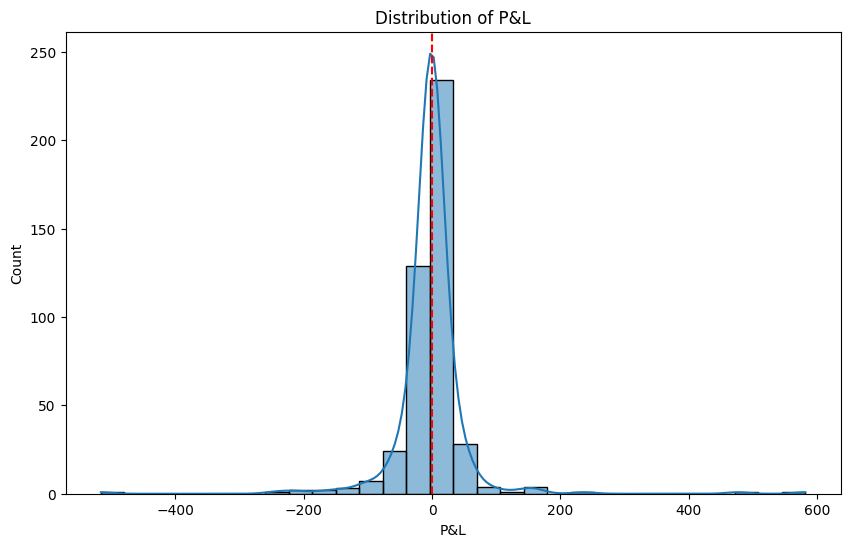

In [147]:
#Visualize the distribution of P&L values.
plt.figure(figsize=(10, 6))
sns.histplot(trades['PL'], bins=30, kde=True)
plt.title('Distribution of P&L')
plt.xlabel('P&L')
plt.axvline(0, color='red', linestyle='--') # Highlight break-even point<br>plt.show()



Cumulative Profit Curve

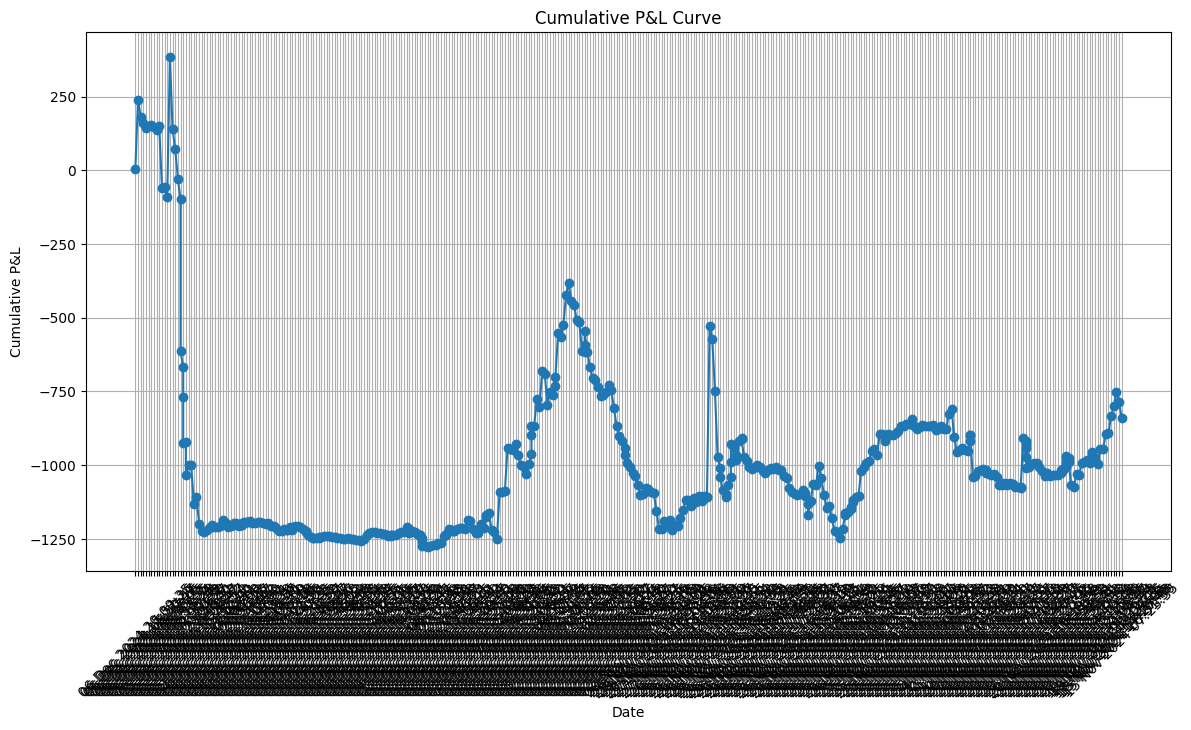

In [148]:
# Show how cumulative P&L changes over time
trades['Cumulative PL'] = trades['PL'].cumsum()
plt.figure(figsize=(14, 7))
plt.plot(trades['DATE/TIME'], trades['Cumulative PL'], marker='o', linestyle='-')
plt.title('Cumulative P&L Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Win Rate Visualization

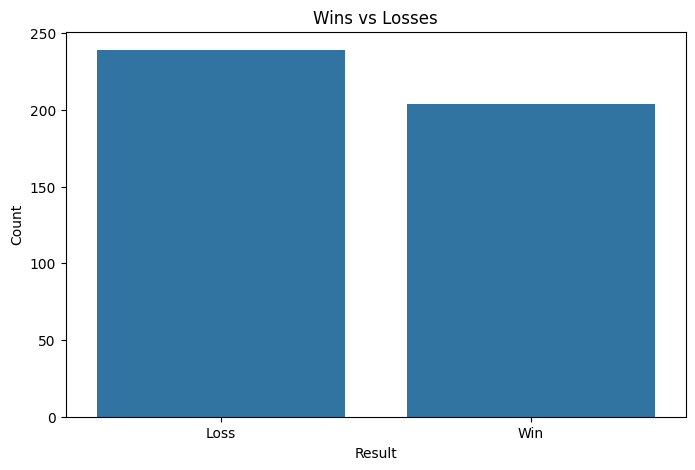

In [149]:
# Visualize the number of wins and losses
win_counts = trades['PL'].apply(lambda x: 'Win' if x > 0 else 'Loss').value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title('Wins vs Losses')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Average P&L per Trade

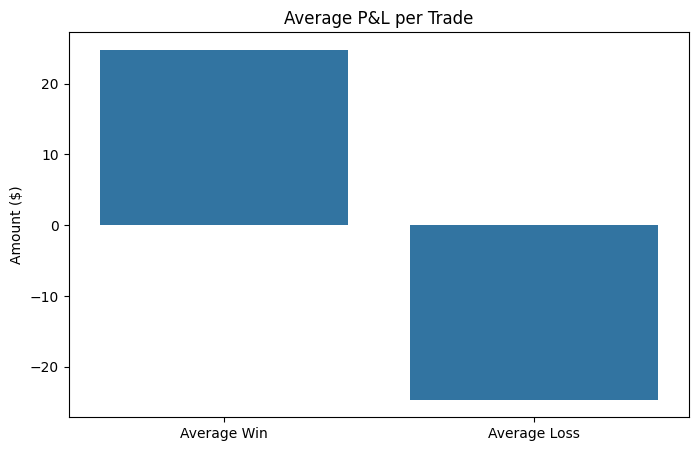

In [150]:
# Show average P&L for wins and losses
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=['Average Win', 'Average Loss'], y=[avg_win, avg_loss])
plt.title('Average P&L per Trade')
plt.ylabel('Amount ($)')
plt.show()

In [151]:
# Calculate and print average win and loss
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()

# Display the results
print(f'Average win per trade: ${avg_win:.2f}')
print(f'Average loss per trade: ${avg_loss:.2f}')


Average win per trade: $24.76
Average loss per trade: $-24.65


To improve the appearance of your Cumulative Profit Curve and make it more readable, you can take the following steps:

Ensure Dates are Sorted: Make sure your DataFrame is sorted by date, so the cumulative profit is plotted in the correct order.

Format the X-axis: Use date formatting to reduce clutter, showing only a few key dates instead of every date.

Reduce Gridlines: You can adjust the gridlines to make the graph less cluttered.

Step 1: Sort the DataFrame by Date
Make sure your DataFrame is sorted by the date column. Assuming your date column is named 'DATE/TIME', you can do this:

In [152]:
# Convert 'DATE/TIME' to datetime format if it’s not already
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Sort the DataFrame by date
trades.sort_values(by='DATE/TIME', inplace=True)

Step 2: Plot the Cumulative Profit Curve
Now, modify the plotting code to enhance readability:

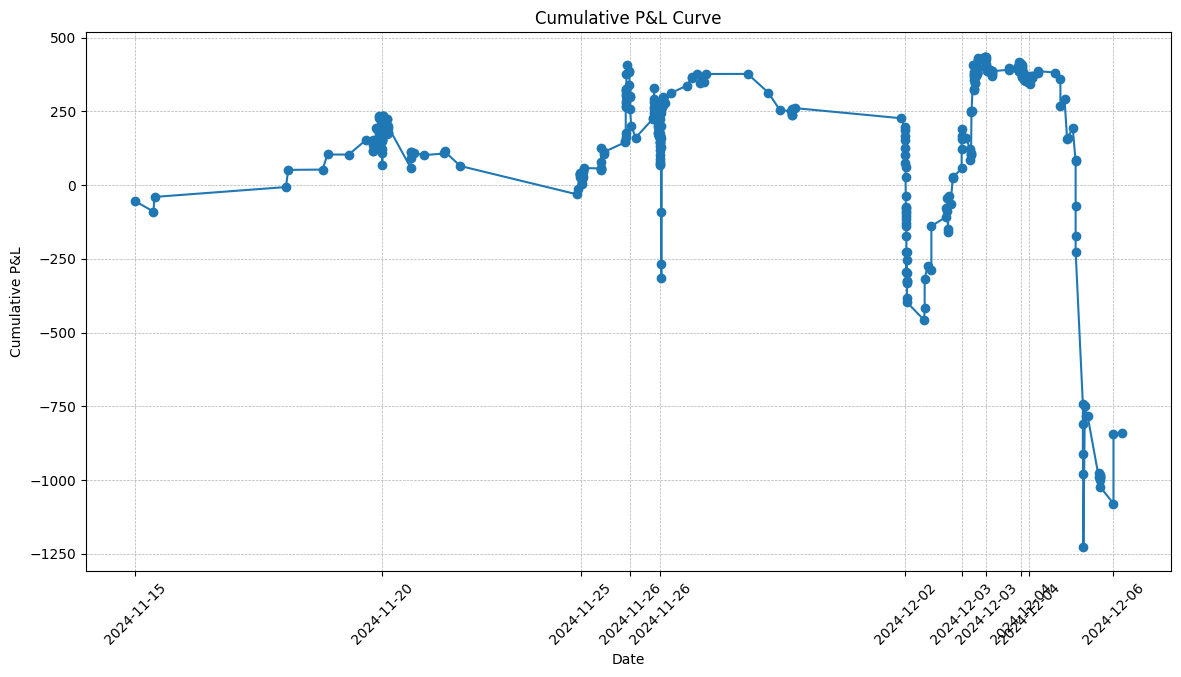

In [153]:
# Calculate Cumulative PL
trades['Cumulative PL'] = trades['PL'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(trades['DATE/TIME'], trades['Cumulative PL'], marker='o', linestyle='-')
plt.title('Cumulative P&L Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')

# Set x-axis format to show fewer ticks
plt.xticks(ticks=trades['DATE/TIME'][::len(trades)//10], rotation=45)  # Show every 10th date for clarity

# Adjust gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Change line style and width
plt.show()


# EDGE ANALYSIS

In [154]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $24.76
Average Loss: $-24.65
Expectancy: $-1.90


In [155]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Calculate risk-to-reward ratio
risk_to_reward_ratio = abs(average_loss / average_win) if average_win != 0 else None

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')
print(f'Risk-to-Reward Ratio: {risk_to_reward_ratio:.2f}' if risk_to_reward_ratio is not None else 'Risk-to-Reward Ratio: Undefined (Average Win is zero)')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $24.76
Average Loss: $-24.65
Expectancy: $-1.90
Risk-to-Reward Ratio: 1.00


# Update github

Navigate to Your Project Directory: Make sure you are in the correct directory where your Git repository is located (e.g., C:\Users\user\Documents\Algo Trading\Trading Analytics). Use the cd command to change directories:

cd "C:\Users\user\Documents\Algo Trading\Trading Analytics"

Check Git Status Again: After changing to the correct directory, run:

git status

You should see the status of your Git repository, including any changes you've made.

Stage Your Changes: If you see the modified files that you want to commit, stage them using:

git add .

Commit Your Changes: After staging, commit your changes:

git commit -m "overall stats and edge"

1/ can i do a new commit before git push. 2/ or can i delete the previous commit or change it 3/ if yes do i have to do git add again 4/ what's best practice if i make a mistake with git commit (do new git commit , delete previous, or it does mkatter as long as i have not done git push)
Great questions! Let’s go through each of your queries step-by-step:

1. Can I do a new commit before git push?
Yes, you can create a new commit at any time before you push to the remote repository. Each commit is independent, and you can have multiple commits waiting to be pushed.

2. Can I delete the previous commit or change it?
Yes, you can modify the last commit using the following methods:

Amend the Last Commit: If you want to change the last commit (e.g., to modify the commit message or add changes), you can use:

git commit --amend

This will allow you to modify the last commit. You may need to stage any new changes with git add before using this command.

Delete the Last Commit: If you want to remove the last commit entirely and reset your branch to the previous state, you can use:

git reset --soft HEAD~1

This will keep your changes in the working directory (unstaged), allowing you to recommit them if needed.

If you prefer to discard the changes along with the commit:

git reset --hard HEAD~1

3. If yes, do I have to do git add again?
If you use git commit --amend, you should stage any new changes with git add before amending.
If you use git reset --soft HEAD~1, your changes remain in the working directory, so you can modify and stage them again as needed.
If you use git reset --hard HEAD~1, your changes will be lost, and you would not need to do git add again since there would be no changes.
4. What's best practice if I make a mistake with git commit?
The best practice depends on the situation:

If you need to change the last commit: Use git commit --amend if it's a minor change (like fixing a typo in the commit message or adding a small change).

If you want to start over with the last commit: Use git reset --soft HEAD~1 to keep your changes for further editing or git reset --hard HEAD~1 if you want to discard everything and start fresh.

If everything is correct: If you haven’t pushed yet and everything looks good, simply continue working as planned. You can always make new commits as needed.

# Edge per product

In [156]:
import pandas as pd

# Load your trading data (assuming it's already done)
# trades = pd.read_csv('Trading_Data.csv')

# Create a sample trades DataFrame for demonstration
# trades = pd.DataFrame({
#     'PRODUCT': ['Product A', 'Product A', 'Product B', 'Product B', 'Product A'],
#     'PL': [30, -10, 20, -5, 40]
# })

# Group data by PRODUCT
grouped = trades.groupby('PRODUCT')

# Prepare a results DataFrame
results = pd.DataFrame(columns=['Product', 'Total Trades', 'Win Rate', 'Average Win', 'Average Loss', 'Expectancy'])

for product, group in grouped:
    total_trades = len(group)
    wins = group[group['PL'] > 0]
    losses = group[group['PL'] <= 0]

    win_rate = len(wins) / total_trades if total_trades > 0 else 0
    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    expectancy = (win_rate * average_win) + ((1 - win_rate) * average_loss)

    # Append results to the DataFrame
    results = results.append({
        'Product': product,
        'Total Trades': total_trades,
        'Win Rate': win_rate,
        'Average Win': average_win,
        'Average Loss': average_loss,
        'Expectancy': expectancy,
    }, ignore_index=True)

# Display the results
print(results)


AttributeError: 'DataFrame' object has no attribute 'append'